▶ 15턴 종료 시점, 연차별 평균 인원수
    연차   평균_인원수
0    1  380.000
1    2  235.742
2    3  145.978
3    4   90.430
4    5   55.945
5    6   34.839
6    7   21.739
7    8   13.325
8    9    8.415
9   10    5.116
10  11    3.223
11  12    2.002
12  13    1.196
13  14    0.821
14  15    1.229


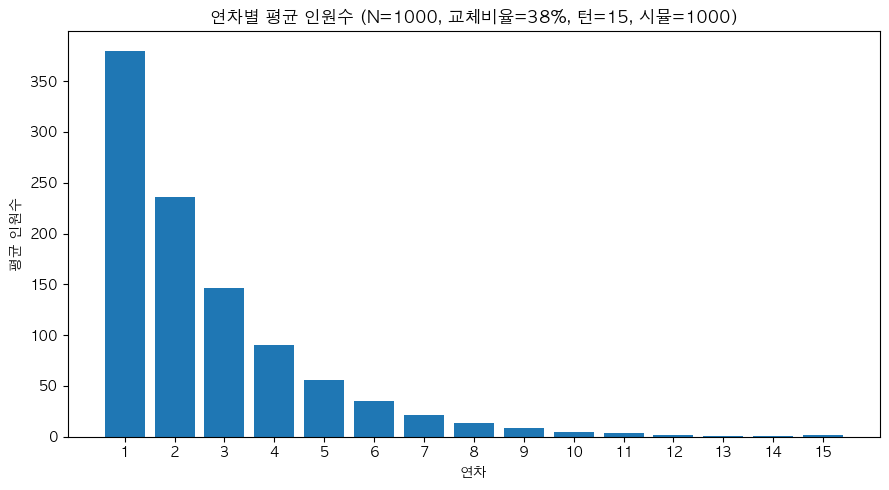

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

# -----------------------
# 파라미터 설정 & 실행
# -----------------------
N = 1000
x_percent = 38     # 매 턴 교체 비율(%)
T = 15
sims = 1000

def simulate_tenure_distribution(N=1000, x_percent=5, T=15, sims=1000, seed=42):
    """
    N: 초기 노드 수
    x_percent: 매 턴 제거/충원 비율(%)  예: 5 => 5%
    T: 총 턴 수 (최대 연차도 T)
    sims: 시뮬레이션 반복 횟수
    """
    rng = np.random.default_rng(seed)
    x = x_percent / 100.0
    out = np.zeros((sims, T), dtype=float)  # 각 시뮬의 최종(턴 T) 연차 카운트

    remove_n_base = int(round(N * x))
    remove_n_base = max(0, min(N, remove_n_base))

    for s in range(sims):
        # 1턴 시작: 모두 1년차
        ages = np.ones(N, dtype=np.int16)

        # 턴 2부터 T까지 반복
        for _ in range(2, T + 1):
            # 매 턴, 무작위로 x% 제거
            remove_n = remove_n_base
            if remove_n > 0:
                remove_idx = rng.choice(N, size=remove_n, replace=False)
                keep_mask = np.ones(N, dtype=bool)
                keep_mask[remove_idx] = False

                survivors = ages[keep_mask] + 1    # 살아남은 사람은 연차 +1
                newcomers = np.ones(remove_n, dtype=np.int16)  # 새로 들어온 사람은 1년차
                ages = np.concatenate([survivors, newcomers])

                # 혹시 반올림 등으로 길이가 어긋나면 보정
                if ages.size != N:
                    if ages.size < N:
                        ages = np.concatenate([ages, np.ones(N - ages.size, dtype=np.int16)])
                    else:
                        keep_idx = rng.choice(ages.size, size=N, replace=False)
                        ages = ages[keep_idx]
            else:
                # 제거 0이면 모두 생존 → 연차 +1
                ages = ages + 1

            # 연차 상한은 T(최대 T년차)
            ages = np.clip(ages, 1, T)

        # 최종 턴에서의 연차 분포(1~T) 집계
        counts = np.bincount(ages, minlength=T + 1)[1:T + 1]
        out[s] = counts

    return out  # shape: (sims, T)



res = simulate_tenure_distribution(N=N, x_percent=x_percent, T=T, sims=sims, seed=42)

# 각 연차별 평균 인원수
mean_counts = res.mean(axis=0)  # length T (1~T년차)
mean_df = pd.DataFrame({
    "연차": np.arange(1, T + 1),
    "평균_인원수": mean_counts
})

print("▶ 15턴 종료 시점, 연차별 평균 인원수")
print(mean_df)

# -----------------------
# 시각화
# -----------------------
plt.figure(figsize=(9,5))
plt.bar(mean_df["연차"], mean_df["평균_인원수"])
plt.title(f"연차별 평균 인원수 (N={N}, 교체비율={x_percent}%, 턴={T}, 시뮬={sims})")
plt.xlabel("연차")
plt.ylabel("평균 인원수")
plt.xticks(range(1, T + 1))
plt.tight_layout()
plt.show()


▶ 15턴 종료 시점, 연차별 평균 인원수
    연차   평균_인원수
0    1  170.000
1    2  141.166
2    3  116.828
3    4   97.233
4    5   80.740
5    6   66.966
6    7   55.544
7    8   46.064
8    9   38.258
9   10   31.706
10  11   26.328
11  12   21.916
12  13   18.198
13  14   15.130
14  15   73.923


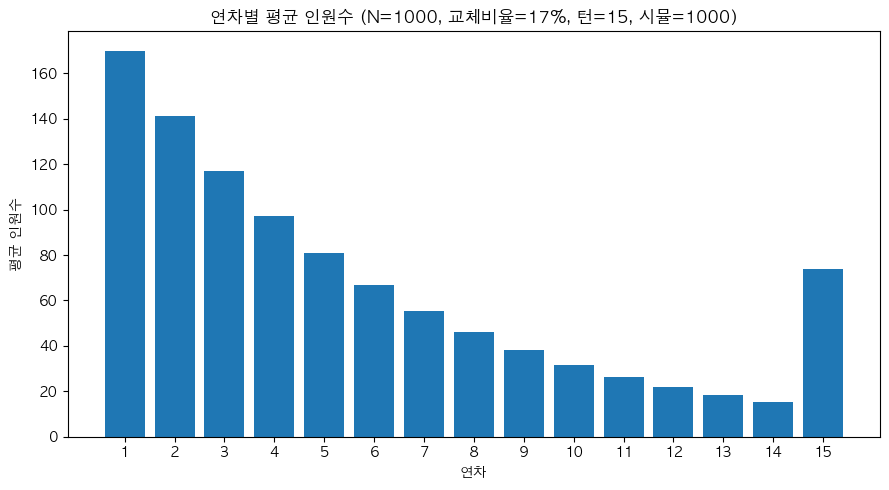

In [12]:
N = 1000
x_percent = 17     # 매 턴 교체 비율(%)
T = 15
sims = 1000

res = simulate_tenure_distribution(N=N, x_percent=x_percent, T=T, sims=sims, seed=42)

# 각 연차별 평균 인원수
mean_counts = res.mean(axis=0)  # length T (1~T년차)
mean_df = pd.DataFrame({
    "연차": np.arange(1, T + 1),
    "평균_인원수": mean_counts
})

print("▶ 15턴 종료 시점, 연차별 평균 인원수")
print(mean_df)

# -----------------------
# 시각화
# -----------------------
plt.figure(figsize=(9,5))
plt.bar(mean_df["연차"], mean_df["평균_인원수"])
plt.title(f"연차별 평균 인원수 (N={N}, 교체비율={x_percent}%, 턴={T}, 시뮬={sims})")
plt.xlabel("연차")
plt.ylabel("평균 인원수")
plt.xticks(range(1, T + 1))
plt.tight_layout()
plt.show()
